<a href="https://colab.research.google.com/github/pmensah28/Machine-Learning-Projects/blob/main/Meningitis_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MENINGITIS ANALSIS AND PREDICTION IN THE UPPER WEST REFION - GHANA**

In [ ]:
#Import All Required Libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pandas as pd
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)


from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize

#neural network
import tensorflow as tf
from tensorflow import keras

import plotly.graph_objects as go
from nltk.corpus import stopwords
# supress unnecessary warning, helping your presentation to look great.
import warnings
warnings.filterwarnings('ignore')

In [ ]:
meningitis_data = pd.read_csv('/content/drive/MyDrive/Datasets/Meningitis_2020.csv')
meningitis_data.head()

,EPID,EpiWeek,Reporting_Sub-district,Reporting_District,Latitude,Longitude,District_of_Residence,Health_Facility,Village,Age,Sex,Onset_Date,Fever,NeckStiff,Headache,Other,Outcome,Vaccinated?,Latex,Culture,PCR (Polymerase_Chain_Reaction),Final_Result,Final_Classification,Observations
0,GHA-UPW-NAN-20-0001,1,Nandom Sub,Nandom,10.8526,-2.7606,Nandom,Nandom Hospital,Domangye,58,M,01/01/2020,Yes,No,No,Altered Consciousness,Dead,Unknown,S.Pneumoniae,Not Done,Pending,Pending,Probable,"Patient Dead, Csf Cloudy"
1,GHA-UPW-NAN-20-0002,1,Nandom Sub,Nandom,10.8526,-2.7606,Nandom,Nandom Hospital,Domangye,17,M,04/01/2020,Yes,No,No,Kernig Signs,Alive,Unknown,Not Done,Not Done,Negative,Negative,Confirmed,"Patient Recovered, Csf Bloody"
2,GHA-UPW-NAN-20-0003,1,Nandom Sub,Nandom,10.8526,-2.7606,Nandom,Nandom Hospital,Piiri,60,F,01/01/2020,No,No,Yes,Kernig Signs,Dead,Unknown,Not Done,Not Done,Negative,Negative,Confirmed,"Patient Dead, Csf Clear"
3,GHA-UPW-NKD-20-0001,1,Kaleo,Nadowli-Kaleo,10.3667,-2.6500,Nadowli-Kaleo,Nadowli Hospital,Mwajaari,62,F,24/12/2019,Yes,Yes,No,Altered Consciousness,Alive,Unknown,Negative,Not Done,Pending,Pending,Suspected,Patient Under Other Treatment.Aspect Of Sample...
4,GHA-UPW-NKD-20-0002,2,Nadowli,Nadowli-Kaleo,10.3667,-2.6500,Nadowli-Kaleo,Nadowli Hospital,Sorokuo,28,F,05/01/2020,No,Yes,Yes,None,Alive,No,Negative,Not Done,S.Pneumoniae,S.Pneumoniae,Confirmed,Patient Under Other Treatment.Aspect Of Sample...


## **EXPLORATORY DATA ANALYSIS**

In [ ]:
meningitis_data.shape

(413, 24)

In [ ]:
meningitis_data.columns

Index(['EPID', 'EpiWeek', 'Reporting_Sub-district', 'Reporting_District',
       'Latitude', 'Longitude', 'District_of_Residence', 'Health_Facility',
       'Village', 'Age', 'Sex', 'Onset_Date', 'Fever', 'NeckStiff', 'Headache',
       'Other', 'Outcome', 'Vaccinated?', 'Latex', 'Culture',
       'PCR (Polymerase_Chain_Reaction)', 'Final_Result',
       'Final_Classification', 'Observations'],
      dtype='object')

In [ ]:
meningitis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   EPID                             413 non-null    object 
 1   EpiWeek                          413 non-null    int64  
 2   Reporting_Sub-district           408 non-null    object 
 3   Reporting_District               413 non-null    object 
 4   Latitude                         413 non-null    float64
 5   Longitude                        413 non-null    float64
 6   District_of_Residence            413 non-null    object 
 7   Health_Facility                  413 non-null    object 
 8   Village                          410 non-null    object 
 9   Age                              413 non-null    int64  
 10  Sex                              412 non-null    object 
 11  Onset_Date                       413 non-null    object 
 12  Fever                 

In [ ]:
meningitis_data.Final_Result.value_counts()

Pending           243
Negative           83
Nmx                38
S.Pneumoniae       18
Not Done           13
Positive            2
Nm                  2
H. Influenzae       1
 S. Pneumoniae      1
Nmw                 1
Name: Final_Result, dtype: int64

In [ ]:
meningitis_data['Final_Classification'].value_counts()

Suspected    212
Confirmed    136
Probable      65
Name: Final_Classification, dtype: int64

In [ ]:
meningitis_data['Observations'].value_counts()

Patient Under Treatment, Csf Clear                        75
Clear                                                     52
Cloudy                                                    31
Patient Under Other Treatment.Aspect Of Sample:Clear.     24
Patient Under Other Treatment. Aspect Of Sample: Clear    20
                                                          ..
Patient Under Treatment. Aspect Of Sample: Bloody          1
Patient Under Treatment. Aspect Of Sample: Clear           1
Patient Is Dead.  Aspect Of Sample: Cloudy                 1
Patient Treatment.Aspect Of Sample:Clear.                  1
Patient Died After 8 Days Of Treatment                     1
Name: Observations, Length: 80, dtype: int64

In [ ]:
meningitis_data.groupby(['Final_Classification','Sex'])[['Fever','NeckStiff','Headache']].count()

Fever  NeckStiff  Headache
Final_Classification Sex                            
Confirmed            F       66         66        66
                     M       70         70        70
Probable             F       25         25        24
                     M       39         39        39
Suspected            F       96         95        95
                     M      115        115       110

In [ ]:
meningitis_data.groupby(['Final_Classification', 'Sex'])['Outcome'].agg(['count'])

count
Final_Classification Sex       
Confirmed            F       66
                     M       70
Probable             F       25
                     M       39
Suspected            F       97
                     M      115

In [ ]:
# district_grp = df.groupby(['Reporting_District'])
# nand = district_grp.get_group('Nandom')
# nand.groupby(['Final_Classification'])['Reporting_District'].count()

In [ ]:
meningitis_data.groupby(['District_of_Residence','Final_Classification'], as_index=False)['Outcome'].count()

,District_of_Residence,Final_Classification,Outcome
0,Baseble,Suspected,1
1,Burkina,Probable,1
2,Burkina,Suspected,1
3,Dbi,Confirmed,8
4,Dbi,Probable,2
5,Dbi,Suspected,10
6,Jirapa,Confirmed,17
7,Jirapa,Probable,16
8,Jirapa,Suspected,37
9,Lambussie,Confirmed,8


In [ ]:
df = meningitis_data
df['Age_Group'] = pd.cut(df['Age'], bins=3, labels=('Young', 'Middle_Age', 'Old'))

In [ ]:
df

NameError: ignored

In [ ]:
df.groupby(['Age_Group'], as_index=False)['Outcome'].count()

,Age_Group,Outcome
0,Young,286
1,Middle_Age,102
2,Old,25


In [ ]:
meningitis_data.isna().sum()

In [ ]:
meningitis_data = meningitis_data.dropna(axis=0).reset_index(drop=True)
# unneeded_columns = ["EPID", "Onset_Date"]
# meningitis_data.drop(unneeded_columns, axis=1, inplace=True)
print("Total number of missing values:", meningitis_data.isna().sum())

Total number of missing values: EPID                               0
EpiWeek                            0
Reporting_Sub-district             0
Reporting_District                 0
Latitude                           0
Longitude                          0
District_of_Residence              0
Health_Facility                    0
Village                            0
Age                                0
Sex                                0
Onset_Date                         0
Fever                              0
NeckStiff                          0
Headache                           0
Other                              0
Outcome                            0
Vaccinated?                        0
Latex                              0
Culture                            0
PCR (Polymerase_Chain_Reaction)    0
Final_Result                       0
Final_Classification               0
Observations                       0
dtype: int64


In [ ]:
{column: len(meningitis_data[column].unique()) for column in meningitis_data.columns if meningitis_data.dtypes[column] =='object'}

{'Culture': 9,
 'District_of_Residence': 18,
 'EPID': 373,
 'Fever': 2,
 'Final_Classification': 3,
 'Final_Result': 10,
 'Headache': 2,
 'Health_Facility': 14,
 'Latex': 8,
 'NeckStiff': 2,
 'Observations': 74,
 'Onset_Date': 175,
 'Other': 85,
 'Outcome': 2,
 'PCR (Polymerase_Chain_Reaction)': 8,
 'Reporting_District': 7,
 'Reporting_Sub-district': 41,
 'Sex': 2,
 'Vaccinated?': 3,
 'Village': 236}

## **MACHINE LEARNING**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def Labelencoder_feature(x):
    le=LabelEncoder()
    x=le.fit_transform(x)
    return x
meningitis_data=meningitis_data.apply(Labelencoder_feature)
meningitis_data.head()

,EPID,EpiWeek,Reporting_Sub-district,Reporting_District,Latitude,Longitude,District_of_Residence,Health_Facility,Village,Age,Sex,Onset_Date,Fever,NeckStiff,Headache,Other,Outcome,Vaccinated?,Latex,Culture,PCR (Polymerase_Chain_Reaction),Final_Result,Final_Classification,Observations
0,102,0,23,3,6,1,9,5,48,56,1,1,1,0,0,7,1,1,6,4,6,7,1,19
1,103,0,23,3,6,1,9,5,48,17,1,18,1,0,0,52,0,1,4,4,1,2,0,26
2,104,0,23,3,6,1,9,5,162,58,0,1,0,0,1,52,1,1,4,4,1,2,0,18
3,221,0,17,2,2,4,7,4,136,60,0,138,1,1,0,7,0,1,0,4,6,7,2,42
4,222,1,21,2,2,4,7,4,180,26,0,27,0,1,1,62,0,0,0,4,7,9,0,42


In [ ]:
meningitis_data.groupby(['Final_Classification', 'Sex'])[['Fever',	'NeckStiff',	'Headache']].sum()

Fever  NeckStiff  Headache
Final_Classification Sex                            
0                    0       44         37        25
                     1       48         38        15
1                    0       17         18        13
                     1       29         30        16
2                    0       65         48        34
                     1       72         41        27

In [ ]:
full_latest = meningitis_data[meningitis_data['Onset_Date'] == max(meningitis_data['Onset_Date'])].reset_index()

In [ ]:
full_latest_grouped = full_latest.groupby('Reporting_District')[['Fever', 'Headache', 'Other']].sum().reset_index()

In [ ]:
temp_f = full_latest_grouped.sort_values(by='Fever', ascending=False)

In [ ]:
temp_f = temp_f[['Reporting_District', 'Fever', 'Headache', 'Other']]
temp_f = temp_f.reset_index(drop=True)

In [ ]:
meningitis_data.describe()

,EPID,EpiWeek,Reporting_Sub-district,Reporting_District,District_of_Residence,Health_Facility,Village,Age,Sex,Onset_Date,Fever,NeckStiff,Headache,Other,Outcome,Vaccinated?,Latex,Culture,PCR (Polymerase_Chain_Reaction),Final_Result,Final_Classification,Observations
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,185.762032,12.628342,20.235294,3.259358,7.435829,5.379679,115.991979,23.839572,0.529412,83.703209,0.735294,0.566845,0.347594,42.855615,0.131016,1.120321,3.636364,3.799465,4.705882,5.721925,1.136364,33.270053
std,107.773741,7.358557,8.274010,1.604152,4.152573,2.295867,67.231563,22.234334,0.499803,48.869582,0.441767,0.496175,0.476844,23.743954,0.337870,0.461916,1.312495,1.414176,1.941260,2.176575,0.905813,22.028967
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,93.250000,8.000000,16.000000,2.000000,4.000000,4.000000,57.250000,6.000000,0.000000,41.000000,0.000000,0.000000,0.000000,20.000000,0.000000,1.000000,4.000000,4.000000,4.000000,5.000000,0.000000,8.000000
50%,185.500000,11.000000,21.000000,3.000000,7.000000,5.000000,115.500000,15.000000,1.000000,83.500000,1.000000,1.000000,0.000000,52.000000,0.000000,1.000000,4.000000,4.000000,6.000000,7.000000,1.000000,39.000000
75%,278.750000,16.000000,23.000000,4.000000,9.000000,8.000000,171.750000,40.000000,1.000000,123.750000,1.000000,1.000000,1.000000,62.000000,0.000000,1.000000,4.000000,4.000000,6.000000,7.000000,2.000000,49.000000
max,372.000000,37.000000,40.000000,7.000000,17.000000,13.000000,235.000000,82.000000,1.000000,174.000000,1.000000,1.000000,1.000000,84.000000,1.000000,2.000000,7.000000,8.000000,7.000000,9.000000,2.000000,73.000000


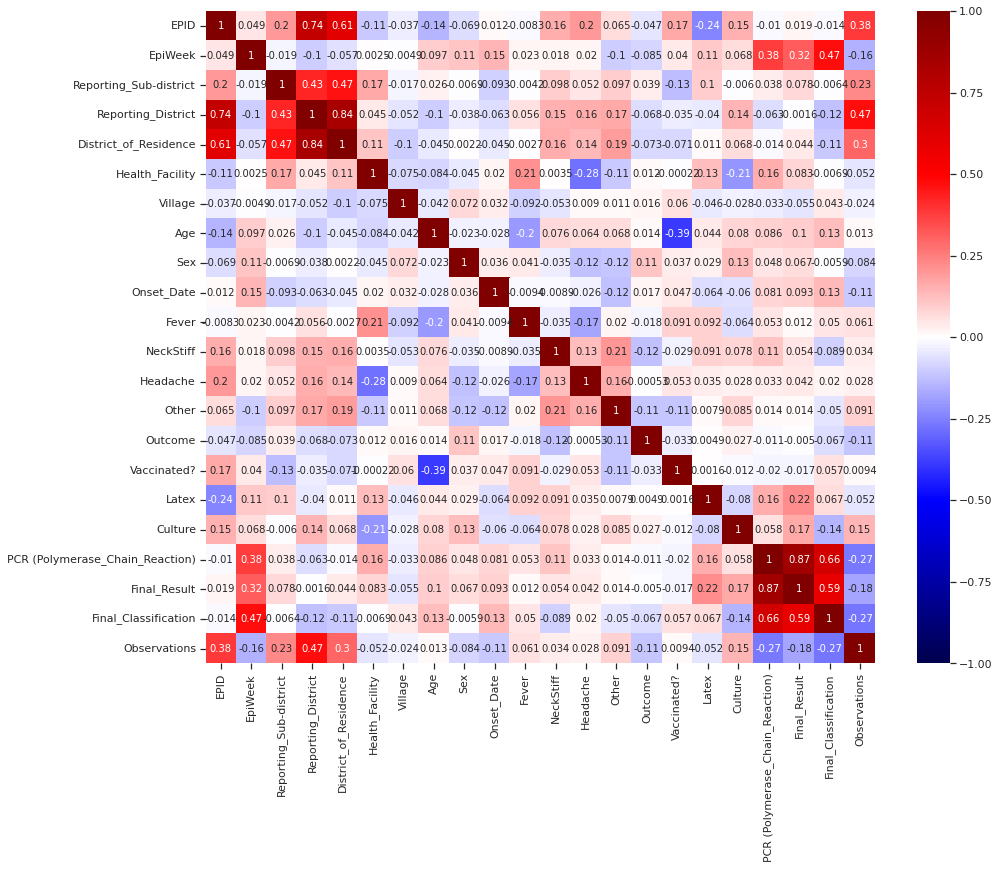

In [ ]:
corr_matrix = meningitis_data.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, cmap="seismic")
plt.gca().patch.set(hatch="data", edgecolor="#666")
plt.show()

In [ ]:
meningitis_data.sort_values('Fever', ascending= False).style\
    .background_gradient(cmap='BrBG_r', subset=['Fever'])\
    .background_gradient(cmap='YlGn_r', subset=["NeckStiff"])\
    .background_gradient(cmap='YlOrBr',subset=['Other'])

,EPID,EpiWeek,Reporting_Sub-district,Reporting_District,District_of_Residence,Health_Facility,Village,Age,Sex,Onset_Date,Fever,NeckStiff,Headache,Other,Outcome,Vaccinated?,Latex,Culture,PCR (Polymerase_Chain_Reaction),Final_Result,Final_Classification,Observations
0,102,0,23,4,9,5,48,56,1,1,1,0,0,7,1,1,6,4,6,7,1,19
224,325,12,31,5,12,9,82,18,0,142,1,1,0,28,0,1,4,4,6,7,2,31
231,45,12,16,1,3,8,18,6,1,120,1,0,0,31,0,2,4,1,6,7,2,5
230,44,12,16,1,3,8,106,8,1,114,1,0,0,7,0,1,4,1,6,7,2,5
229,43,12,16,1,3,8,234,8,0,127,1,0,0,7,0,1,4,1,6,7,2,5
228,346,12,3,6,15,3,22,10,0,134,1,0,0,54,0,1,0,4,6,7,2,10
227,345,12,19,6,16,3,176,8,1,127,1,1,1,79,0,1,0,4,6,2,2,11
226,344,12,29,6,8,3,192,6,0,120,1,1,1,1,0,1,0,4,6,2,2,10
225,326,12,31,5,12,9,202,31,0,148,1,1,0,62,0,1,4,4,6,7,2,31
223,324,12,36,5,12,12,212,5,1,109,1,1,1,73,0,2,4,4,6,7,2,32


In [ ]:
y = meningitis_data['Final_Classification'].copy()
X = meningitis_data.drop('Final_Classification', axis=1).copy()

In [ ]:
X=X.astype(np.float)

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.        , 0.575     , 0.57142857, ..., 0.85714286, 0.77777778,
        0.26027397],
       [0.        , 0.575     , 0.57142857, ..., 0.14285714, 0.22222222,
        0.35616438],
       [0.        , 0.575     , 0.57142857, ..., 0.14285714, 0.22222222,
        0.24657534],
       ...,
       [0.97297297, 0.4       , 0.14285714, ..., 0.85714286, 0.77777778,
        0.06849315],
       [1.        , 0.575     , 0.57142857, ..., 0.71428571, 0.66666667,
        0.67123288],
       [1.        , 0.575     , 0.57142857, ..., 0.71428571, 0.66666667,
        0.71232877]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=99)

## **NEURAL NETWORK**

In [ ]:
inputs = tf.keras.Input(shape=(X.shape[1],))
X = tf.keras.layers.Dense(64, activation="relu")(inputs)
X = tf.keras.layers.Dense(64, activation="relu")(X)
outputs = tf.keras.layers.Dense(3, activation="softmax")(X)

In [ ]:
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

batch_size = 32
epochs = 200

In [ ]:
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    batch_size = batch_size,
    epochs = epochs,
    
)

Epoch 1/200
8/8 [==============================] - 1s 24ms/step - loss: 1.0322 - accuracy: 0.4561 - val_loss: 0.9913 - val_accuracy: 0.5500
Epoch 2/200
8/8 [==============================] - 0s 6ms/step - loss: 0.9786 - accuracy: 0.5523 - val_loss: 0.9564 - val_accuracy: 0.5333
Epoch 3/200
8/8 [==============================] - 0s 5ms/step - loss: 0.9375 - accuracy: 0.6025 - val_loss: 0.9278 - val_accuracy: 0.6667
Epoch 4/200
8/8 [==============================] - 0s 6ms/step - loss: 0.8914 - accuracy: 0.7071 - val_loss: 0.8958 - val_accuracy: 0.7167
Epoch 5/200
8/8 [==============================] - 0s 5ms/step - loss: 0.8443 - accuracy: 0.7448 - val_loss: 0.8562 - val_accuracy: 0.7167
Epoch 6/200
8/8 [==============================] - 0s 6ms/step - loss: 0.7988 - accuracy: 0.7531 - val_loss: 0.8116 - val_accuracy: 0.7167
Epoch 7/200
8/8 [==============================] - 0s 9ms/step - loss: 0.7577 - accuracy: 0.7573 - val_loss: 0.7724 - val_accuracy: 0.7333
Epoch 8/200
8/8 [=========

In [ ]:
acc_train = round(model.evaluate(X_train, y_train, verbose=0)[1] * 100, 2)
acc_test = round(model.evaluate(X_test, y_test, verbose=0)[1] * 100, 2)

In [ ]:
print(f"Train Accuracy:  {acc_train}")
print(f"Test Accuracy: {acc_test}")

Train Accuracy:  94.98
Test Accuracy: 69.33


In [ ]:
anny_pred = model.predict(X_test)
rounded_predicted_labels = np.argmax(anny_pred, axis=1) 

print('\nClassification Report for Testing\n')
print(classification_report(
    digits=4,
    y_true=y_test, 
    y_pred=rounded_predicted_labels, target_names=['Class 0', 'Class 1', 'Class 2']))


Classification Report for Testing

              precision    recall  f1-score   support

     Class 0     0.7857    0.8462    0.8148        26
     Class 1     0.4444    0.2667    0.3333        15
     Class 2     0.6842    0.7647    0.7222        34

    accuracy                         0.6933        75
   macro avg     0.6381    0.6258    0.6235        75
weighted avg     0.6714    0.6933    0.6765        75



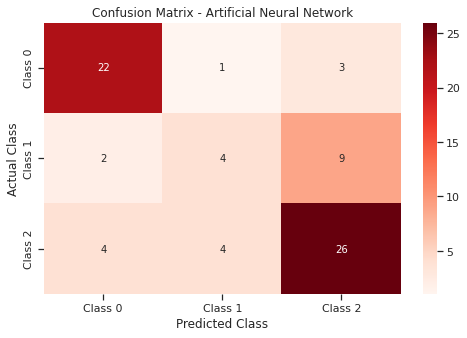

In [ ]:
cm_ann = confusion_matrix(y_true=y_test, y_pred=rounded_predicted_labels)
index = ["Class 0", "Class 1", "Class 2"]
columns = ["Class 0", "Class 1", "Class 2"]
conf_matrix = pd.DataFrame(data=cm_ann, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds") 
plt.title("Confusion Matrix - Artificial Neural Network")
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

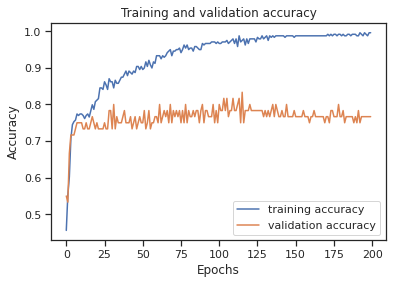

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training accuracy', 'validation accuracy'], loc='lower right')
plt.show()

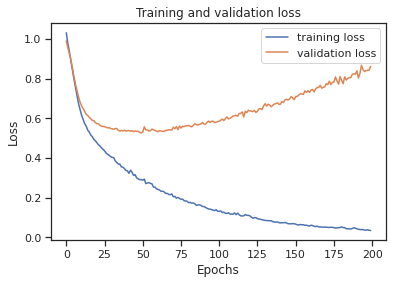

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['training loss', 'validation loss'], loc='upper right')
plt.show()


In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
dt_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)

In [ ]:
print(f"Test Accuracy: {acc_decision_tree}\n")
print("Classification Report for Testing\n")
print(classification_report(
    digits=4,
    y_true=y_test,
     y_pred=dt_pred, target_names=["Class 0", "Class 1", "Class 3"]
))

Test Accuracy: 82.67

Classification Report for Testing

              precision    recall  f1-score   support

     Class 0     0.9259    0.9615    0.9434        26
     Class 1     0.8333    0.3333    0.4762        15
     Class 3     0.7619    0.9412    0.8421        34

    accuracy                         0.8267        75
   macro avg     0.8404    0.7453    0.7539        75
weighted avg     0.8331    0.8267    0.8040        75



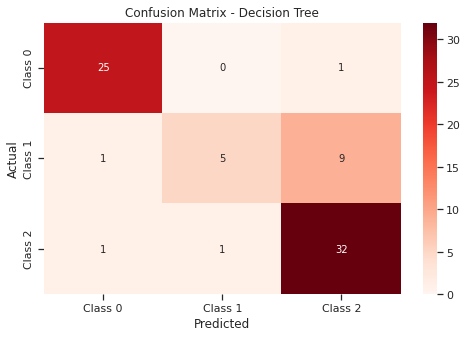

In [ ]:
confmat = confusion_matrix(y_true=y_test, y_pred=dt_pred)

index = ["Class 0", "Class 1", "Class 2"]
columns = ["Class 0", "Class 1", "Class 2"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds") 
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## **GAUSSIAN NAIVE-BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [ ]:
model.fit(X_train, y_train)
rf_pred_Gaussian = model.predict(X_test)
acc_Gaussian = round(model.score(X_test, y_test) * 100, 2)

In [ ]:
print(f"Test Accuracy: {acc_Gaussian}\n")
print("Classification Report for Testing\n")
print(classification_report(
    digits=4,
    y_true=y_test,
     y_pred=rf_pred_Gaussian, target_names=["Class 0", "Class 1", "Class 2"]
))

Test Accuracy: 78.67

Classification Report for Testing

              precision    recall  f1-score   support

     Class 0     1.0000    0.8462    0.9167        26
     Class 1     0.4545    0.3333    0.3846        15
     Class 2     0.7619    0.9412    0.8421        34

    accuracy                         0.7867        75
   macro avg     0.7388    0.7069    0.7145        75
weighted avg     0.7830    0.7867    0.7765        75



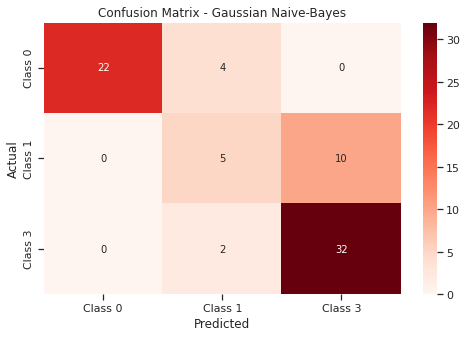

In [ ]:
confmat = confusion_matrix(y_true=y_test, y_pred=rf_pred_Gaussian)

index = ["Class 0", "Class 1", "Class 3"]
columns = ["Class 0", "Class 1", "Class 3"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds") 
plt.title("Confusion Matrix - Gaussian Naive-Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
from sklearn.svm import SVC

In [ ]:
model_svm = SVC()
model_svm.fit(X_train, y_train)
rf_pred_svm = model_svm.predict(X_test)
acc_svm = round(model_svm.score(X_test, y_test) * 100, 2)

In [ ]:
print(f"Test Accuracy: {acc_svm}\n")
print("Classification Report for Testing\n")
print(classification_report(
    digits=4,
    y_true=y_test,
     y_pred=rf_pred_svm, target_names=["Class 0", "Class 1", "Class 3"]
))

Test Accuracy: 72.0

Classification Report for Testing

              precision    recall  f1-score   support

     Class 0     0.8696    0.7692    0.8163        26
     Class 1     0.5000    0.0667    0.1176        15
     Class 3     0.6600    0.9706    0.7857        34

    accuracy                         0.7200        75
   macro avg     0.6765    0.6022    0.5732        75
weighted avg     0.7006    0.7200    0.6627        75



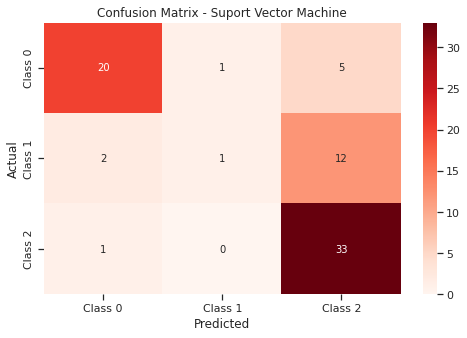

In [ ]:
confmat = confusion_matrix(y_true=y_test, y_pred=rf_pred_svm)

index = ["Class 0", "Class 1", "Class 2"]
columns = ["Class 0", "Class 1", "Class 2"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds") 
plt.title("Confusion Matrix - Suport Vector Machine")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()